In [1]:
import pandas as pd
import numpy as np

In [9]:
data = pd.read_csv('data.csv')
# data.info()
data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,2
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,3
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1592
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,1593
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,1594
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1595


In [8]:
x = data.iloc[:,0:11]
y = data.iloc[:,11]
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
dtypes: float64(11)
memory usage: 98.4 KB


In [15]:
from sklearn import model_selection
# help(model_selection.train_test_split)
x_train,x_test,y_train,y_test = model_selection.train_test_split( x,y ,test_size=0.2,random_state=42,shuffle=True)


In [18]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()


clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

In [21]:
from sklearn import metrics
# print(" tn     fp   fn    tp")
# print(metrics.confusion_matrix(y_test,y_pred).ravel())
metrics.confusion_matrix(y_true=y_test,y_pred=y_pred)

array([[ 0,  4,  2,  0,  0],
       [ 0, 72, 23,  1,  0],
       [ 0, 34, 63,  2,  0],
       [ 0,  3, 18,  5,  0],
       [ 0,  0,  0,  2,  0]], dtype=int64)

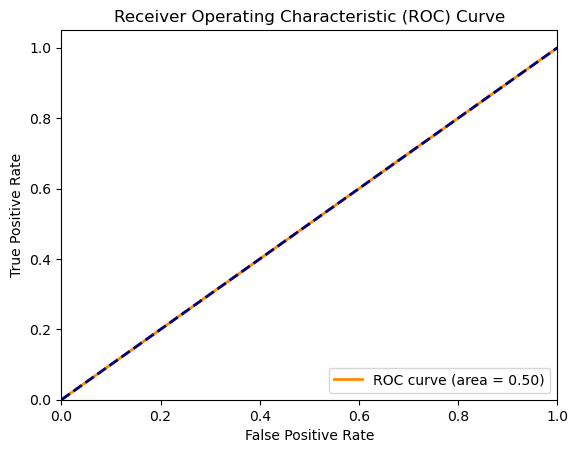

In [9]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# 假设 y_test 是测试集的真实标签，y_pred_prob 是模型的预测概率
# 注意：这里假设你已经使用模型进行了预测，并得到了预测概率
# 如果你还没有模型或者没有预测结果，需要先进行模型的训练和预测
# 以下代码仅用于演示如何绘制ROC曲线，需要根据实际情况进行调整

# 计算 ROC 曲线的 FPR 和 TPR
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# 计算 ROC 曲线下的面积（AUC）
roc_auc = auc(fpr, tpr)

# 绘制 ROC 曲线
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()
